# Stock Market Project 11/19/2021

The motivation behind this project is to have a starting value of $250000.00 and purchase stocks that would result in a profit. For me, this was a good starting point towards learning about stocks since I have very little experience. This model showcases the three tech stock prices that I have chose and the **risk vs reward** that the tech stocks provide.

The three stocks that I chose were Tesla, Apple, and Microsoft because these companies within the tech industry have been around for years as well as are companies that most competitive within the tech space. I have invested 10 shares per stock as a base starting point of this project.

To start off, we have to download and import the libraries that are required as well as get the dataset that is needed.

In [1]:
!pip install pandas_datareader
!pip install yfinance
!pip install yahoo-finance
!pip install datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
from pandas.plotting import scatter_matrix
from datetime import datetime
import yfinance as yf
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader

**Then, define a list of stocks to invest in and set a start date and end date that you would like to view the data from. In this example, I am looking at the stocks from Tesla, Apple, and Microsoft and I have defined the start date to being January 1, 2020 and the end date as November 19, 2021. There may be a more efficient way to define the dates, but for this model I just decided to hard code define them.**

In [2]:
syb_list = ['TSLA', 'AAPL', 'MSFT']

start_date = datetime.fromisoformat('2020-01-01')
end_date = datetime.fromisoformat('2021-11-19')

for stock_val in syb_list:
    globals()[stock_val] = DataReader(stock_val, 'yahoo', start_date, end_date)

**Then, I had created a graph to show the stocks based off of price and graphed this. As the graph shows, the price of stock has increased over time and had caused the value of one share to be expensive.**

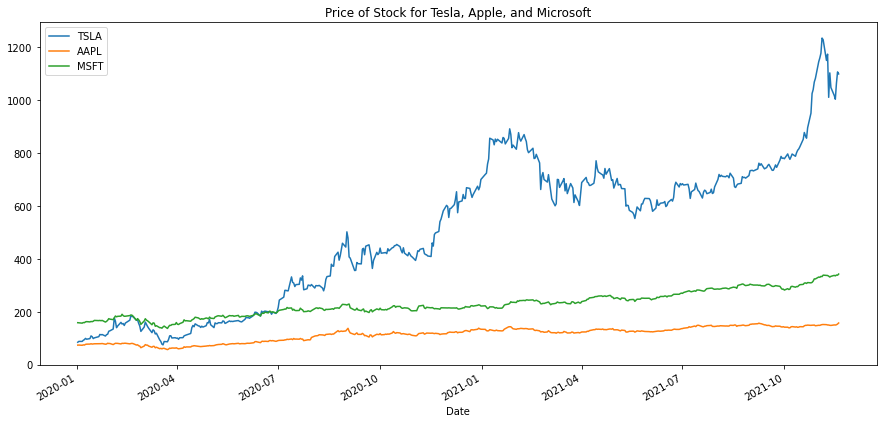

In [3]:
TSLA['Open'].plot(label='TSLA', figsize = (15,7))
AAPL['Open'].plot(label='AAPL')
MSFT['Open'].plot(label='MSFT')
mplt.title('Price of Stock for Tesla, Apple, and Microsoft')
mplt.legend()

In [4]:
syb = ['TSLA', 'AAPL', 'MSFT']

pdf = pd.DataFrame()
data_of_syb = []
for symbol in syb:
    pdf = pd.merge(pdf, pd.DataFrame(yf.download(symbol, fields='price', start=start_date, end=end_date)['Adj Close']), right_index=True, left_index=True, how='outer')
    
    data_of_syb.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**After this, we would like view the various fields of the table and analyze the risk vs reward that we get from investing in these stocks. The data that is currently important for this model is the standard deviation and the mean. The standard deviation and average returns of the stock help analyze the risk component of this model as shown below.** 

In [5]:
pdf.columns = data_of_syb
pdf.describe()

,TSLA,AAPL,MSFT
count,476.000000,476.000000,476.000000
mean,503.423650,114.259664,226.474317
std,274.829379,27.379915,47.519610
min,72.244003,55.402668,133.249512
25%,199.850994,88.529678,194.964539
50%,582.820007,121.213860,216.282043
75%,705.827484,134.056393,256.928307
max,1229.910034,157.869995,341.269989


Text(0, 0.5, 'Standard Deviation from Stock Symbol')

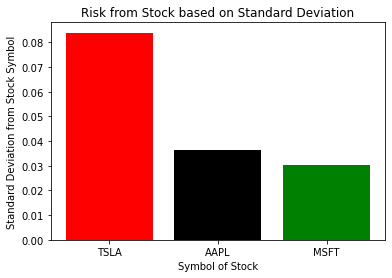

In [6]:
returns = pdf.pct_change(periods=3)
mplt.bar(returns.columns, returns.std(), color=['red', 'black', 'green'])
mplt.title("Risk from Stock based on Standard Deviation")
mplt.xlabel("Symbol of Stock")
mplt.ylabel("Standard Deviation from Stock Symbol")

Text(0, 0.5, 'Average Returns from Stock Symbol')

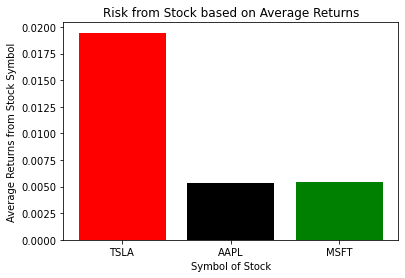

In [7]:
mplt.bar(returns.columns, returns.mean(), color=['red', 'black', 'green'])
mplt.title("Risk from Stock based on Average Returns")
mplt.xlabel("Symbol of Stock")
mplt.ylabel("Average Returns from Stock Symbol")

In [8]:
standard_deviation_vals = pd.DataFrame(returns.std())
sd_vals = standard_deviation_vals.rename(columns={0: 'standard deviation', **{'font-weight': 'bold'}})
mean_vals = pd.DataFrame(returns.mean())
m_vals = mean_vals.rename(columns={0: 'mean', **{'font-weight': 'bold'}})
print(sd_vals.head())
print(m_vals.head())

      standard deviation
TSLA            0.083909
AAPL            0.036328
MSFT            0.030345
          mean
TSLA  0.019465
AAPL  0.005346
MSFT  0.005393


**Based off of the values and bar graphs of the risk of the average returns and the standard deviation, we could see that these stocks are well worth investing for since they would be great for profitability in the future, but also pose a great amount of risk because of the increased fluctuation of price per share as well as the standard deviation of the stock being a greater value than the average return value of the stock.** 

# Stock Market Project 11/26/2021

For this week, based on the performance of the three stocks that I have invested in from last week to this week as well as analyzing the risk vs reward strategy, I have decided to work on a **Monte Carlo Simulation using GBM** as a way to alleviate the risk of investing in a stock and help determine whether sticking with the stocks that I have currently invested in would trend well in the future.

To start off, we have to download and import the libraries that are required as well as get the dataset that is needed.

In [9]:
!pip install seaborn
!pip install scipy
!pip install yfinance
!pip install yahoo-finance

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data as dr
from pandas_datareader.data import DataReader
from datetime import datetime
import yfinance as yf

In [10]:
syb = ['TSLA', 'AAPL', 'MSFT']

start_date = datetime.fromisoformat('2020-01-01')
end_date = datetime.fromisoformat('2021-11-26')

pdf = pd.DataFrame()
data_of_syb = []
for symbol in syb:
    pdf = pd.merge(pdf, pd.DataFrame(yf.download(symbol, fields='price', start=start_date, end=end_date)['Adj Close']), right_index=True, left_index=True, how='outer')
    
    data_of_syb.append(symbol)
    
print(pdf.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            Adj Close_x  Adj Close_y   Adj Close
Date                                            
2020-01-02    86.052002    73.988472  157.615112
2020-01-03    88.601997    73.269157  155.652527
2020-01-06    90.307999    73.852974  156.054871
2020-01-07    93.811996    73.505646  154.631973
2020-01-08    98.428001    74.688087  157.095001


In [11]:
syb_list = ['TSLA', 'AAPL', 'MSFT']

start_date_2 = datetime.fromisoformat('2020-01-01')
end_date_2 = datetime.fromisoformat('2021-11-26')

for stock_val in syb_list:
    globals()[stock_val] = DataReader(stock_val, 'yahoo', start_date, end_date)

**Here, we define the return value that we can get based off of the three stocks that I am currently investing in and plotting based off Frequency of Returns.**

In [12]:
closing_price = DataReader(['TSLA', 'MSFT', 'AAPL'], 'yahoo', start_date_2, end_date_2)['Adj Close']

closing_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481 entries, 2020-01-02 to 2021-11-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    481 non-null    float64
 1   MSFT    481 non-null    float64
 2   AAPL    481 non-null    float64
dtypes: float64(3)
memory usage: 15.0 KB


In [13]:
def returns2(pdf):
    return closing_price.pct_change()

returns = returns2(pdf)
returns.dropna(inplace=True)
print(returns.head())

Symbols         TSLA      MSFT      AAPL
Date                                    
2020-01-03  0.029633 -0.012452 -0.009722
2020-01-06  0.019255  0.002585  0.007968
2020-01-07  0.038801 -0.009118 -0.004703
2020-01-08  0.049205  0.015928  0.016086
2020-01-09 -0.021945  0.012493  0.021241


C:\Users\default.DESKTOP-557BIKL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

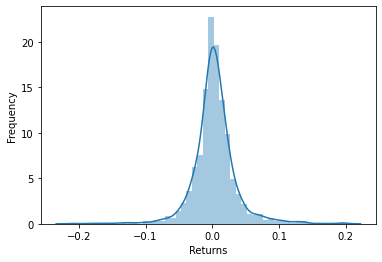

In [14]:
sns.distplot(returns.iloc[1:])
plt.xlabel("Returns")
plt.ylabel("Frequency")

**After this, I calculate the Monte Carlo Simulation using the GBM and plot the corresponding companies that I have invested in.**

In [15]:
num_of_days = 7
delta_t = 1/num_of_days

def monte_carlo_simulation(mean, std, num_of_days, start_price):
    # initialize variables to being zero
    price_val = np.zeros(num_of_days)
    price_val[0] = start_price
    shock_val = np.zeros(num_of_days)
    drift_val = np.zeros(num_of_days)
    
    for val in range(1,num_of_days):
        shock_val[val] = np.random.normal(loc = mean * delta_t, scale = std * np.sqrt(delta_t))
        drift_val[val] = mean * delta_t
        price_val[val] = price_val[val-1] + (price_val[val-1] * (drift_val[val] + shock_val[val]))
    return price_val

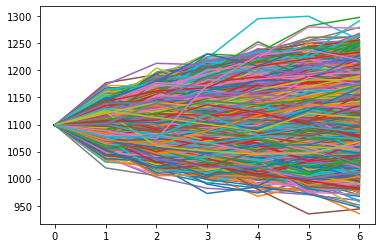

In [16]:
mean = returns.mean()['TSLA']
std = returns.std()['TSLA']
start_price = 1098.87

sim = np.zeros(10000)

for sim_run in range(10000):
    sim[sim_run] = monte_carlo_simulation(mean, std, num_of_days, start_price)[num_of_days-1]
    plt.plot(monte_carlo_simulation(mean, std, num_of_days, start_price))

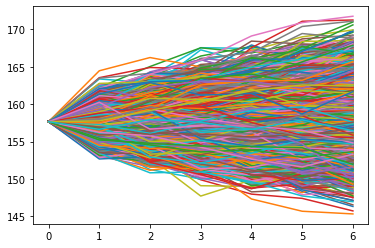

In [17]:
mean = returns.mean()['AAPL']
std = returns.std()['AAPL']
start_price = 157.65

sim = np.zeros(10000)

for sim_run in range(10000):
    sim[sim_run] = monte_carlo_simulation(mean, std, num_of_days, start_price)[num_of_days-1]
    plt.plot(monte_carlo_simulation(mean, std, num_of_days, start_price))

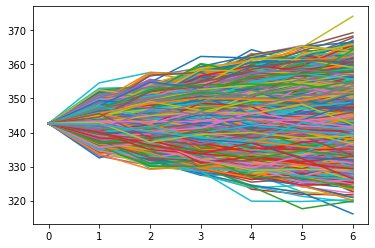

In [18]:
mean = returns.mean()['MSFT']
std = returns.std()['MSFT']
start_price = 342.64

sim = np.zeros(10000)

for sim_run in range(10000):
    sim[sim_run] = monte_carlo_simulation(mean, std, num_of_days, start_price)[num_of_days-1]
    plt.plot(monte_carlo_simulation(mean, std, num_of_days, start_price))

In conclusion, from creating the Monte Carlo Simulation with GBM and from the performance of the stock throughout the week, I have decided to sell 5 stocks from Microsoft since it took a hit during this week in the Stock Market and analyzing from the 10000 simulations of each stock that Microsoft's selling price from its initial selling price is much higher than the other two stocks, resulting in better profitability. This shows the idea of "Buy low, Sell High".

# Stock Market Project 12/03/2021

This week, from the performance of the stock market there was a huge hit as a whole. So, when analyzing the performance of the companies that I have invested in, I had seen that those companies have taken hits as well. So, I wanted to figure out a way to invest in another company that had some growth during this time period. The reason I wanted to approach it this way is so that I could make profit back and to see during a difficult stretch of times, which companies would be able to handle it.

To start off, we have to download and import the libraries that are required as well as get the dataset that is needed.

In [19]:
import pandas as pd
import requests
!pip install requests

**After importing the libraries, I need to find a way to figure out the NASDAQ 100 Companies that have prospered during this week. So, I am going to be using data from slickcharts NASDAQ 100 page in order to achieve this.**

In [20]:
url = "https://www.slickcharts.com/nasdaq100"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36 Edg/96.0.1054.34'}
request = requests.get(url, headers=headers)

html_info = request.content
stock_list = pd.read_html(html_info)
third_week_stock_list = stock_list[0]
print(third_week_stock_list)

       #                  Company Symbol  Weight    Price    Chg     % Chg
0      1                Apple Inc   AAPL  11.867   161.53  -2.23  (-1.36%)
1      2           Microsoft Corp   MSFT  10.808   322.77  -6.72  (-2.04%)
2      3           Amazon.com Inc   AMZN   7.599  3385.00 -52.36  (-1.52%)
3      4                Tesla Inc   TSLA   5.915  1008.00 -76.60  (-7.06%)
4      5              NVIDIA Corp   NVDA   5.210   306.20 -15.06  (-4.69%)
..   ...                      ...    ...     ...      ...    ...       ...
98    99              Incyte Corp   INCY   0.095    65.78  -0.85  (-1.28%)
99   100  Peloton Interactive Inc   PTON   0.076    43.35  -1.10  (-2.47%)
100  101                 Fox Corp   FOXA   0.074    36.04   0.71   (2.01%)
101  102                 Fox Corp    FOX   0.054    33.55   0.64   (1.94%)
102  103      AstraZeneca PLC ADR    AZN   0.000    54.15  -0.64  (-1.17%)

[103 rows x 7 columns]


In [21]:
third_week_stock_list.drop(third_week_stock_list[third_week_stock_list['Chg'] < 0].index, inplace=True)
syb_week3 = third_week_stock_list['Symbol']
print(third_week_stock_list, "\n\n", syb_week3)

       #                         Company Symbol  Weight    Price    Chg  \
10    11           Costco Wholesale Corp   COST   1.553   531.00   5.49   
11    12      Cisco Systems Inc/Delaware   CSCO   1.538    56.25   0.10   
12    13                    Broadcom Inc   AVGO   1.509   559.49   7.04   
13    14                    Comcast Corp  CMCSA   1.490    51.58   0.08   
14    15                     PepsiCo Inc    PEP   1.468   164.67   4.05   
21    22     Honeywell International Inc    HON   0.913   205.38   1.38   
23    24                 T-Mobile US Inc   TMUS   0.883   112.85   2.49   
25    26                     Moderna Inc   MRNA   0.831   304.93   3.44   
26    27      Charter Communications Inc   CHTR   0.773   679.30   8.90   
28    29                       Amgen Inc   AMGN   0.756   202.48   1.31   
29    30               Lam Research Corp   LRCX   0.653   661.80   0.28   
30    31              Analog Devices Inc    ADI   0.644   181.97   1.34   
33    34             Gile

**From the results given, I see that from the NASDAQ 100 companies, there are actually quite a few stocks that had a positive change during this time period. But, for my analysis purpose, since I would like to keep it consistent with the investment of tech companies, I had decided to invest 10 shares within the top three tech companies that had resulted with positive change this week: Marvell Technology Inc, Electronic Arts Inc, and T-Mobile US Inc. I hope that in the investment of these companies I could see some greater profit and to see how the performance of these companies will do throughout the final week of the game.**

# Stock Market Project 12/10/2021

This week, from the performance of the stock market, I had seen that there was a positive increase from the investments that I have made as well as from the stock market as a whole. To analyze the performance and to figure out what stock I should sell or buy shares of, I will be using a **Bollinger Band** to showcase this. 

To start off, we have to download and import the libraries that are required as well as get the dataset that is needed.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf
import pandas_datareader as pdr

**Then, I have to initialize in each of the stocks that I am currently invested in and do it from the time frame of the beginning of 2017 to the current date. I do this so that I could get sufficient data points and to see the other years when a particular stock is meant to be sold or to be bought.**

In [67]:
syb = 'MSFT'
start_date = '2017-01-01'
end_date = '2021-12-08'

df = yf.download(syb, start_date, end_date)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,58.185520,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.925179,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.925179,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,58.427261,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,58.241295,20382700


In [68]:
syb1 = 'EA'
start_date = '2017-01-01'
end_date = '2021-12-08'

df1 = yf.download(syb1, start_date, end_date)

df1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,79.519997,79.620003,78.269997,79.169998,78.673203,2187300
2017-01-04,79.389999,81.110001,79.120003,80.629997,80.124039,1852300
2017-01-05,79.980003,80.459999,78.730003,78.959999,78.464523,3295000
2017-01-06,79.110001,79.519997,78.370003,79.010002,78.514206,2017700
2017-01-09,79.190002,79.430000,78.050003,78.639999,78.146530,2332300


In [69]:
syb2 = 'MRVL'
start_date = '2017-01-01'
end_date = '2021-12-08'

df2 = yf.download(syb2, start_date, end_date)

df2.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,13.93,14.12,13.85,14.05,13.409369,5121500
2017-01-04,14.04,14.26,14.04,14.24,13.590705,4478800
2017-01-05,14.26,14.41,14.03,14.04,13.399824,3006400
2017-01-06,14.08,14.23,13.94,14.18,13.533441,2695800
2017-01-09,14.18,14.39,14.15,14.37,13.714775,4363700


In [70]:
syb3 = 'TMUS'
start_date = '2017-01-01'
end_date = '2021-12-08'

df3 = yf.download(syb3, start_date, end_date)

df3.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,58.099998,58.910000,57.750000,58.320000,58.320000,3004100
2017-01-04,58.360001,59.459999,58.040001,58.820000,58.820000,5540600
2017-01-05,58.770000,59.419998,57.080002,57.610001,57.610001,5427200
2017-01-06,57.869999,58.139999,56.639999,56.770000,56.770000,4776100
2017-01-09,56.570000,56.990002,56.270000,56.669998,56.669998,3329700


In [71]:
syb4 = 'AAPL'
start_date = '2017-01-01'
end_date = '2021-12-08'

df4 = yf.download(syb4, start_date, end_date)

df4.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.332472,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.301878,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.440718,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.746632,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.000782,134247600


In [72]:
syb5 = 'TSLA'
start_date = '2017-01-01'
end_date = '2021-12-08'

df5 = yf.download(syb5, start_date, end_date)

df5.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500


**Then, I had come up with each of the Bollinger Bands calculations for each of the stock. To calculate, for the upper bound you would need to get the value that you would get with the middle bank and add that by the product of the standard deviation based off the 'Adj Close' and 2 as the default value of 'y'. For the lower bound, you would need to get the value that you would get with the middle bank and subtract that by the product of the standard deviation based off the 'Adj Close' and 2 as the default value of 'y'. For the middle bound, you would have to find the moving average in which you would calculate the 'Adj Close' mean.**

In [38]:
# Bollinger Bands for Microsoft
rate = 7
std = df['Adj Close'].rolling(rate).std()
mid = df['Adj Close'].rolling(rate).mean()
df['Upper_Band'] = mid + (2 * std)
df['Middle_Band'] = mid
df['Lower_Band'] = mid - (2 * std)

In [39]:
df.head(30)

,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Middle_Band,Lower_Band
Date,,,,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,58.185516,20694100,NaN,NaN,NaN
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.925182,21340000,NaN,NaN,NaN
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.925182,24876000,NaN,NaN,NaN
2017-01-06,62.299999,63.150002,62.040001,62.840000,58.427258,19922900,NaN,NaN,NaN
2017-01-09,62.759998,63.080002,62.540001,62.639999,58.241306,20382700,NaN,NaN,NaN
2017-01-10,62.730000,63.070000,62.279999,62.619999,58.222706,18593000,NaN,NaN,NaN
2017-01-11,62.610001,63.230000,62.430000,63.189999,58.752678,21517300,58.816976,58.239976,57.662975
2017-01-12,63.060001,63.400002,61.950001,62.610001,58.213409,20968200,58.819589,58.243960,57.668332
2017-01-13,62.619999,62.869999,62.349998,62.700001,58.297089,19422300,58.799395,58.297090,57.794784


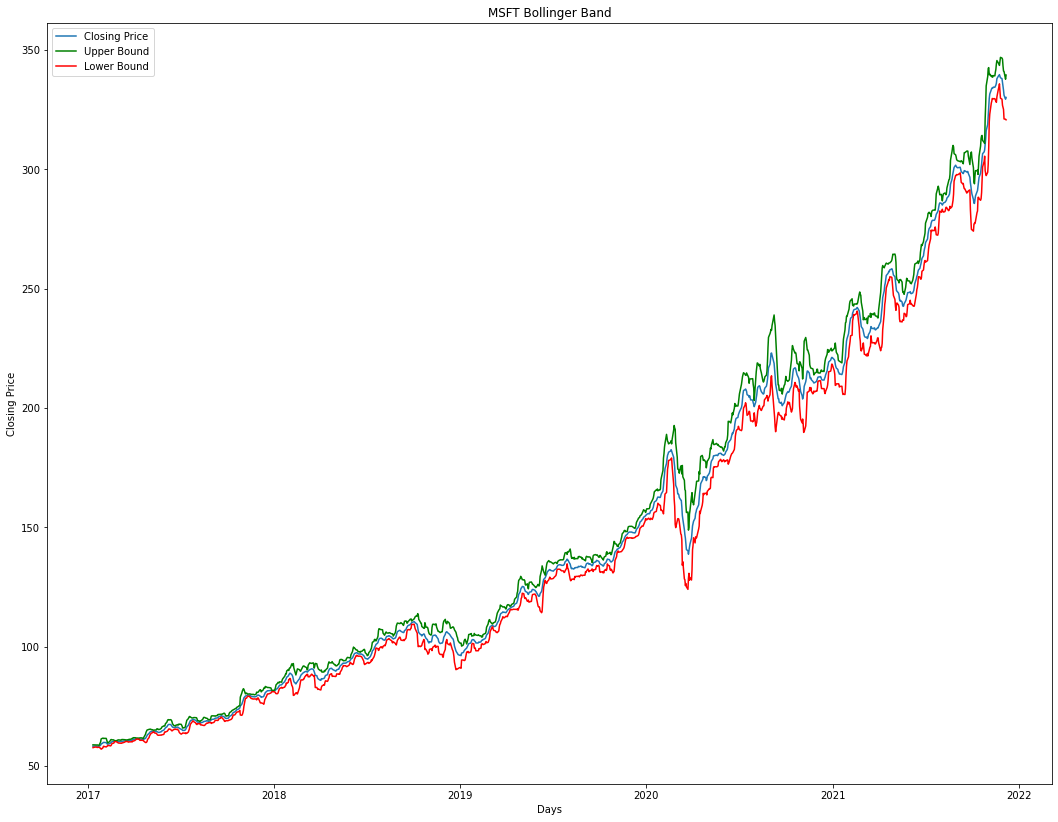

In [41]:
plt.figure(figsize=(18,14))
plt.title(syb + ' Bollinger Band')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df['Middle_Band'], label='Closing Price')
plt.plot(df['Upper_Band'], label='Upper Bound', c='g')
plt.plot(df['Lower_Band'], label='Lower Bound', c = 'r')
plt.legend()
plt.show()

In [42]:
# Bollinger Bands for Electronic Arts
rate = 7
std = df1['Adj Close'].rolling(rate).std()
mid = df1['Adj Close'].rolling(rate).mean()
df1['Upper_Band'] = mid + (2 * std)
df1['Middle_Band'] = mid
df1['Lower_Band'] = mid - (2 * std)

In [43]:
df1.head(30)

,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Middle_Band,Lower_Band
Date,,,,,,,,,
2017-01-03,79.519997,79.620003,78.269997,79.169998,78.673210,2187300,NaN,NaN,NaN
2017-01-04,79.389999,81.110001,79.120003,80.629997,80.124046,1852300,NaN,NaN,NaN
2017-01-05,79.980003,80.459999,78.730003,78.959999,78.464523,3295000,NaN,NaN,NaN
2017-01-06,79.110001,79.519997,78.370003,79.010002,78.514214,2017700,NaN,NaN,NaN
2017-01-09,79.190002,79.430000,78.050003,78.639999,78.146523,2332300,NaN,NaN,NaN
2017-01-10,78.489998,79.230003,77.940002,78.849998,78.355202,2328900,NaN,NaN,NaN
2017-01-11,78.800003,79.419998,78.169998,79.019997,78.524139,2618900,79.995780,78.685980,77.376179
2017-01-12,78.849998,79.760002,78.250000,79.599998,79.100494,2035700,80.093359,78.747020,77.400681
2017-01-13,79.139999,81.260002,79.129997,80.349998,79.845802,2818000,79.867445,78.707271,77.547097


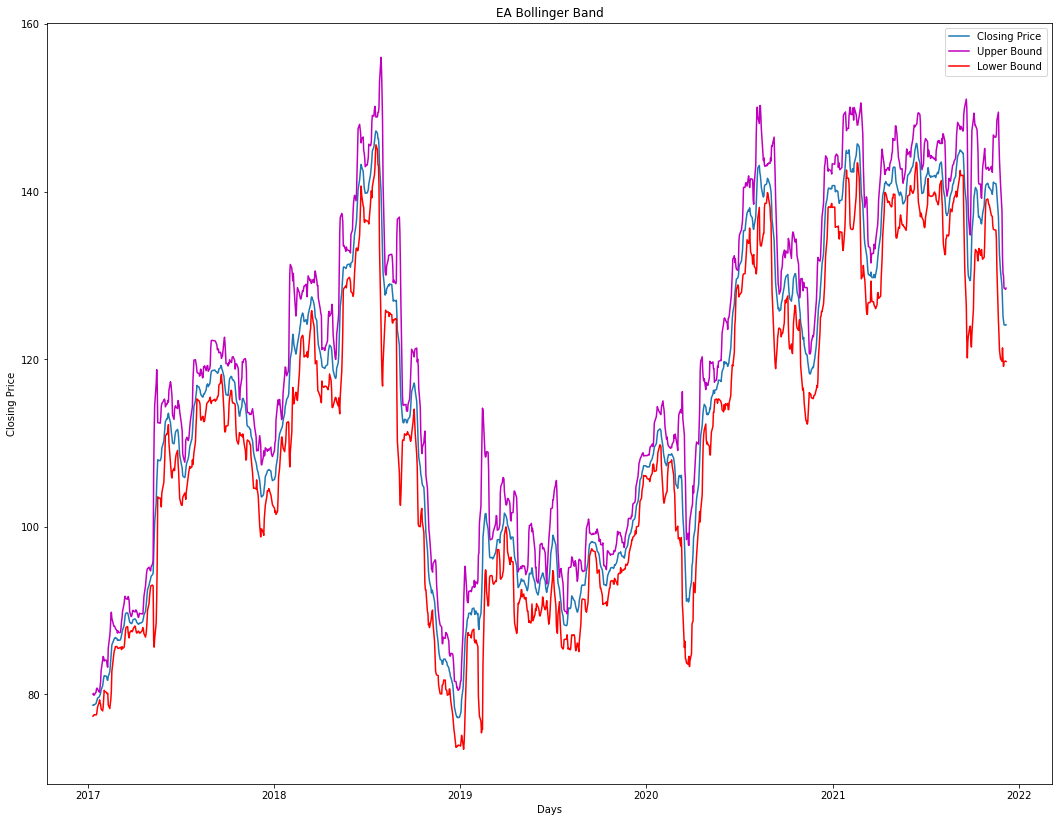

In [50]:
plt.figure(figsize=(18,14))
plt.title(syb1 + ' Bollinger Band')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df1['Middle_Band'], label='Closing Price')
plt.plot(df1['Upper_Band'], label='Upper Bound', c='m')
plt.plot(df1['Lower_Band'], label='Lower Bound', c = 'r')
plt.legend()
plt.show()

In [47]:
# Bollinger Bands for Marvell Technologies
rate = 7
std = df2['Adj Close'].rolling(rate).std()
mid = df2['Adj Close'].rolling(rate).mean()
df2['Upper_Band'] = mid + (2 * std)
df2['Middle_Band'] = mid
df2['Lower_Band'] = mid - (2 * std)

In [48]:
df2.head(30)

,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Middle_Band,Lower_Band
Date,,,,,,,,,
2017-01-03,13.93,14.12,13.85,14.05,13.409367,5121500,NaN,NaN,NaN
2017-01-04,14.04,14.26,14.04,14.24,13.590704,4478800,NaN,NaN,NaN
2017-01-05,14.26,14.41,14.03,14.04,13.399824,3006400,NaN,NaN,NaN
2017-01-06,14.08,14.23,13.94,14.18,13.533439,2695800,NaN,NaN,NaN
2017-01-09,14.18,14.39,14.15,14.37,13.714777,4363700,NaN,NaN,NaN
2017-01-10,14.37,14.59,14.37,14.56,13.896113,4929300,NaN,NaN,NaN
2017-01-11,14.51,14.60,14.38,14.54,13.877025,4407600,14.041107,13.631607,13.222107
2017-01-12,14.44,14.53,14.07,14.42,13.762496,3201700,14.048534,13.682054,13.315574
2017-01-13,14.48,14.60,14.45,14.47,13.810216,2149300,14.080980,13.713413,13.345845


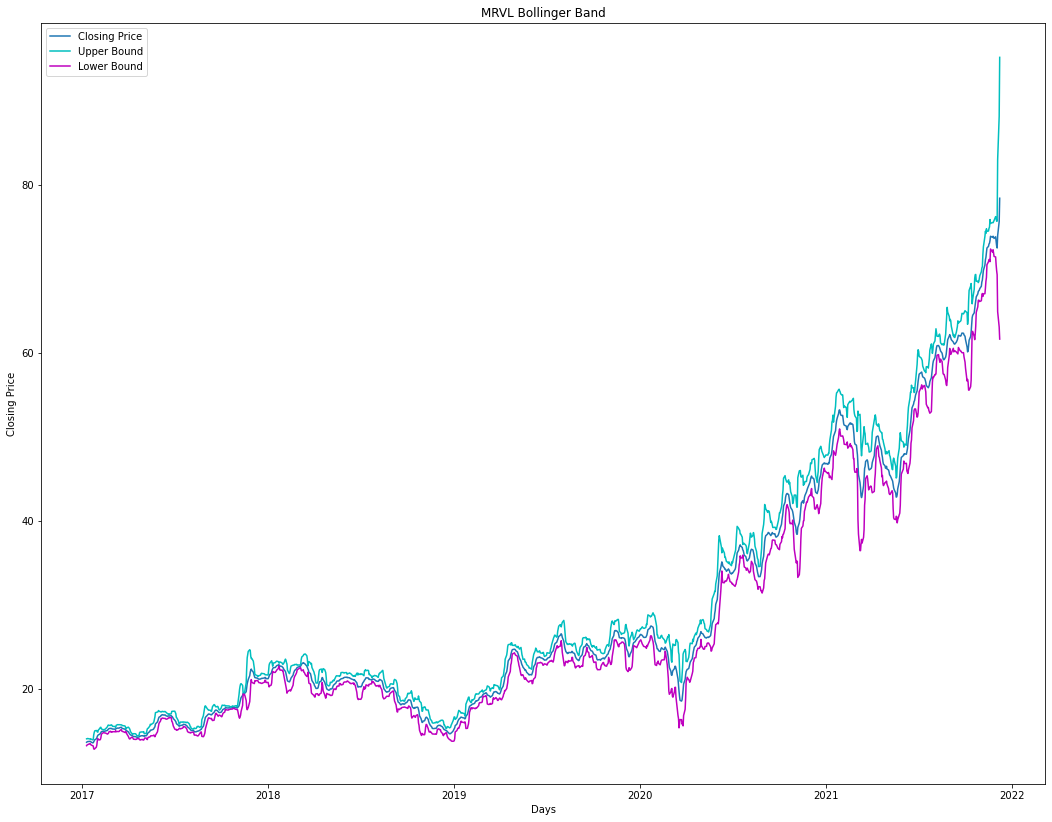

In [51]:
plt.figure(figsize=(18,14))
plt.title(syb2 + ' Bollinger Band')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df2['Middle_Band'], label='Closing Price')
plt.plot(df2['Upper_Band'], label='Upper Bound', c='c')
plt.plot(df2['Lower_Band'], label='Lower Bound', c = 'm')
plt.legend()
plt.show()

In [52]:
#Bollinger Bands for T-Mobile US Inc.
rate = 7
std = df3['Adj Close'].rolling(rate).std()
mid = df3['Adj Close'].rolling(rate).mean()
df3['Upper_Band'] = mid + (2 * std)
df3['Middle_Band'] = mid
df3['Lower_Band'] = mid - (2 * std)

In [53]:
df3.head(30)

,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Middle_Band,Lower_Band
Date,,,,,,,,,
2017-01-03,58.099998,58.910000,57.750000,58.320000,58.320000,3004100,NaN,NaN,NaN
2017-01-04,58.360001,59.459999,58.040001,58.820000,58.820000,5540600,NaN,NaN,NaN
2017-01-05,58.770000,59.419998,57.080002,57.610001,57.610001,5427200,NaN,NaN,NaN
2017-01-06,57.869999,58.139999,56.639999,56.770000,56.770000,4776100,NaN,NaN,NaN
2017-01-09,56.570000,56.990002,56.270000,56.669998,56.669998,3329700,NaN,NaN,NaN
2017-01-10,55.720001,58.840000,55.299999,58.740002,58.740002,5457800,NaN,NaN,NaN
2017-01-11,58.540001,58.939999,57.279999,57.459999,57.459999,4718200,59.535900,57.770000,56.004100
2017-01-12,57.400002,57.500000,56.570000,57.150002,57.150002,2286300,59.347171,57.602857,55.858543
2017-01-13,57.250000,57.849998,56.689999,57.189999,57.189999,1973700,58.754054,57.370000,55.985946


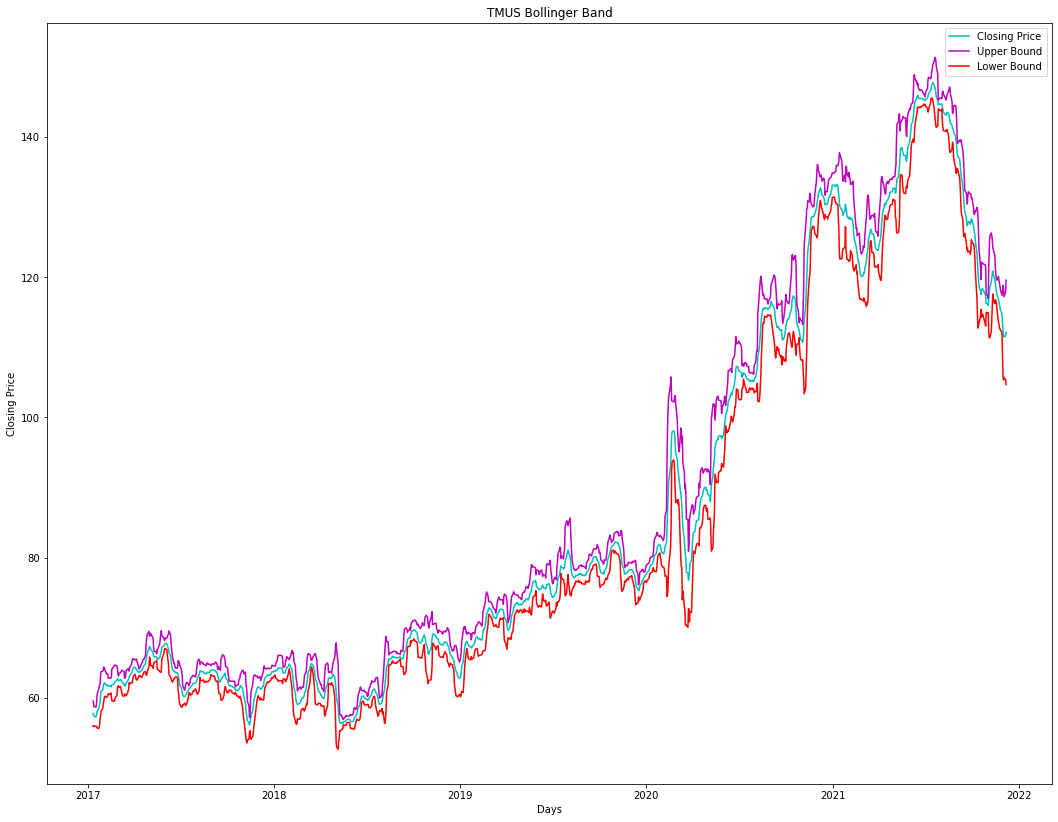

In [55]:
plt.figure(figsize=(18,14))
plt.title(syb3 + ' Bollinger Band')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df3['Middle_Band'], label='Closing Price', c='c')
plt.plot(df3['Upper_Band'], label='Upper Bound', c='m')
plt.plot(df3['Lower_Band'], label='Lower Bound', c = 'r')
plt.legend()
plt.show()

In [60]:
# Bollinger Bands for Apple
rate = 7
std = df4['Adj Close'].rolling(rate).std()
mid = df4['Adj Close'].rolling(rate).mean()
df4['Upper_Band'] = mid + (2 * std)
df4['Middle_Band'] = mid
df4['Lower_Band'] = mid - (2 * std)

In [61]:
df4.head(30)

,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Middle_Band,Lower_Band
Date,,,,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.332470,115127600,NaN,NaN,NaN
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.301878,84472400,NaN,NaN,NaN
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.440722,88774400,NaN,NaN,NaN
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.746637,127007600,NaN,NaN,NaN
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.000782,134247600,NaN,NaN,NaN
2017-01-10,29.692499,29.844999,29.575001,29.777500,28.029018,97848400,NaN,NaN,NaN
2017-01-11,29.684999,29.982500,29.650000,29.937500,28.179625,110354400,28.444123,27.718733,26.993343
2017-01-12,29.725000,29.825001,29.552500,29.812500,28.061960,108344800,28.497171,27.822946,27.148721
2017-01-13,29.777500,29.905001,29.702499,29.760000,28.012545,104447600,28.423906,27.924470,27.425033


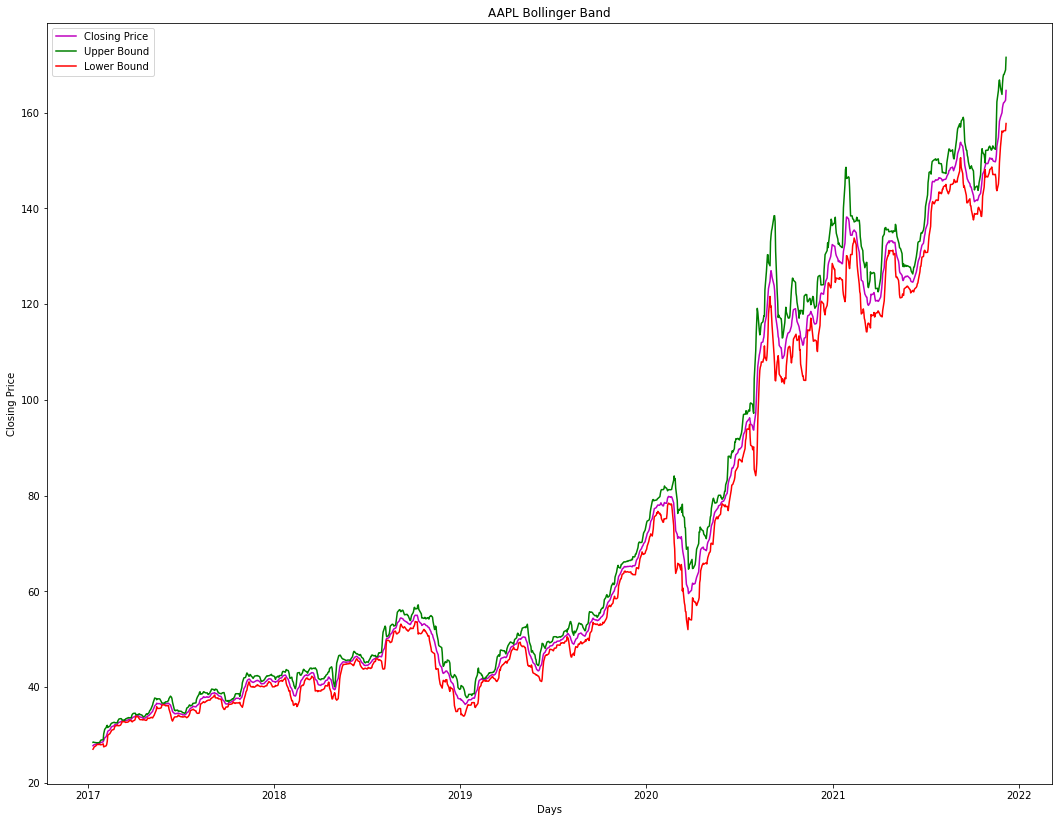

In [62]:
plt.figure(figsize=(18,14))
plt.title(syb4 + ' Bollinger Band')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df4['Middle_Band'], label='Closing Price', c='m')
plt.plot(df4['Upper_Band'], label='Upper Bound', c='g')
plt.plot(df4['Lower_Band'], label='Lower Bound', c = 'r')
plt.legend()
plt.show()

In [63]:
# Bollinger Bands for Tesla
rate = 7
std = df5['Adj Close'].rolling(rate).std()
mid = df5['Adj Close'].rolling(rate).mean()
df5['Upper_Band'] = mid + (2 * std)
df5['Middle_Band'] = mid
df5['Lower_Band'] = mid - (2 * std)

In [64]:
df5.head(30)

,Open,High,Low,Close,Adj Close,Volume,Upper_Band,Middle_Band,Lower_Band
Date,,,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,NaN,NaN,NaN
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,NaN,NaN,NaN
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,NaN,NaN,NaN
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,NaN,NaN,NaN
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,NaN,NaN,NaN
2017-01-10,46.400002,46.400002,45.377998,45.973999,45.973999,18300000,NaN,NaN,NaN
2017-01-11,45.813999,45.995998,45.335999,45.945999,45.945999,18254000,47.364174,45.446285,43.528396
2017-01-12,45.812000,46.139999,45.116001,45.917999,45.917999,18951000,46.458095,45.806285,45.154474
2017-01-13,46.000000,47.570000,45.917999,47.549999,47.549999,30465000,47.492007,46.113713,44.735419


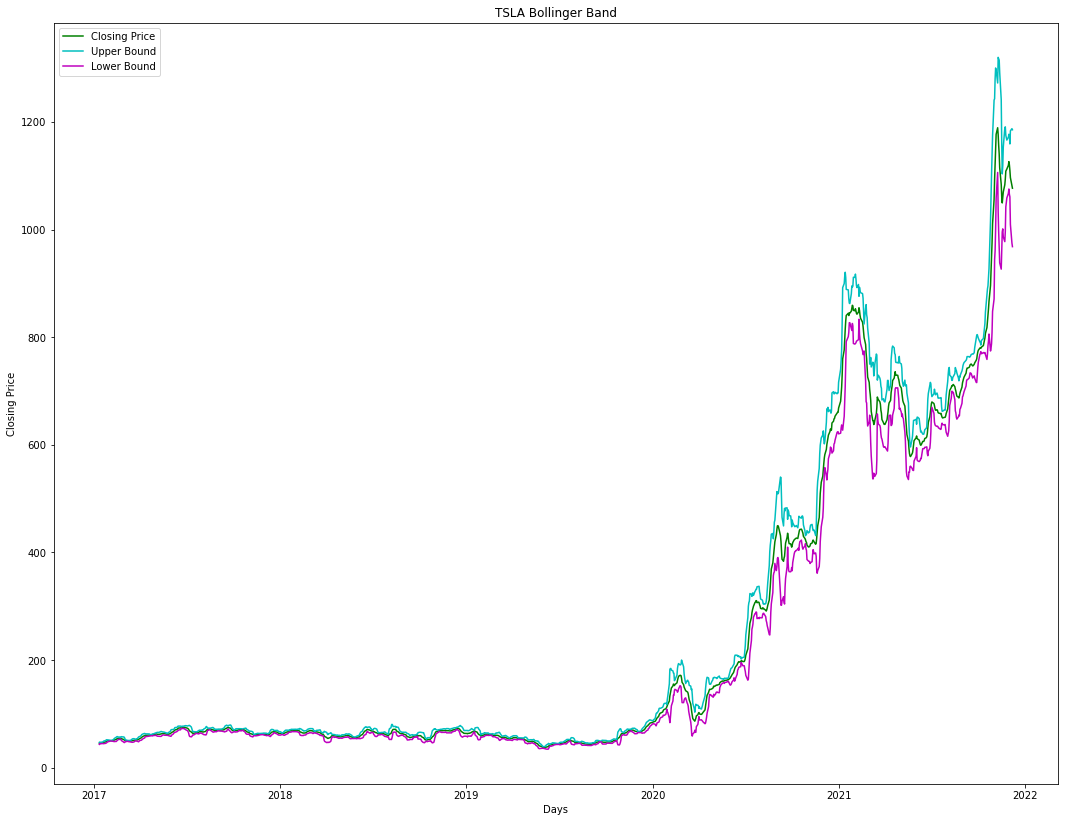

In [65]:
plt.figure(figsize=(18,14))
plt.title(syb5 + ' Bollinger Band')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df5['Middle_Band'], label='Closing Price', c='g')
plt.plot(df5['Upper_Band'], label='Upper Bound', c='c')
plt.plot(df5['Lower_Band'], label='Lower Bound', c = 'm')
plt.legend()
plt.show()

**From the graphs given from each of the Bollinger Bands, I have concluded for the final week of the game I should sell some 5 shares for the T-Mobile US stock. From the stocks that I ended up purchasing last week to the performance that I had gotten from these stocks this week, it was the right decision towards getting those stocks and had recovered some of the damage that was done from the results of the stock market last week.**